# NYC Restaurant Exploratory Data Analysis
-- for data clean up and import/exporting, look at "Getting Yelp & Inspection Score Data" notebook -- 

http://localhost:8892/notebooks/GA_IRIS_RYU/final-projects/02-experiment-writeup/Getting%20Yelp%20%26%20Inspection%20Score%20Data.ipynb

In [369]:
%matplotlib inline
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf

In [378]:
data = pd.read_csv('inspection_data_final.csv')

In [379]:
data

,phone,area,category,postal_code,price_range,rating_value,restaurant,review_count,DBA,BORO,...,Not Yet Graded,P Count,Z Count,Inspection,Times_Graded,Unnamed: 27,Unnamed: 28,Unnamed: 29,Unnamed: 30,Unnamed: 31
0,9295220889,Elmhurst,"Barbeque,\n Hot Pot,\n ...",11373,$11-30,4.0,iCook Buffet,106,ICOOK,QUEENS,...,0,0,0,3,2,NaN,NaN,NaN,NaN,NaN
1,9293377599,Brooklyn,Shanghainese,11201,$11-30,4.0,Yaso Tangbao,387,YASO TANGBAO,BROOKLYN,...,0,0,0,5,3,NaN,NaN,NaN,NaN,NaN
2,9293376412,Brooklyn,"Wine Bars,\n Tapas/Small Pl...",11211,$11-30,5.0,Denizen,37,DENIZEN,BROOKLYN,...,0,0,0,1,1,NaN,NaN,NaN,NaN,NaN
3,9293282890,Astoria,"Japanese,\n Seafood,\n ...",11103,$31-60,4.5,Gaijin,104,GAIJIN,QUEENS,...,0,0,0,2,2,NaN,NaN,NaN,NaN,NaN
4,9292963942,Sunnyside,"Cafes,\n Italian,\n ...",11104,$11-30,4.5,SoleLuna Restaurant,215,SOLELUNA,QUEENS,...,0,0,0,4,3,NaN,NaN,NaN,NaN,NaN
5,9292959542,Brooklyn,"Pizza,\n Italian",11205,$11-30,4.5,Da Ciro Brooklyn,30,DA CIRO BROOKLYN TRATTORIA & PIZZERIA,BROOKLYN,...,0,0,0,2,2,NaN,NaN,NaN,NaN,NaN
6,9292958401,Brooklyn,"Desserts,\n Diners,\n ...",11249,$11-30,4.0,Cheeseboat,137,CHEESEBOAT,BROOKLYN,...,6,0,0,2,1,NaN,NaN,NaN,NaN,NaN
7,9292922010,Brooklyn,"Seafood,\n Wine Bars",11219,$11-30,4.5,Parc Oasis Oyster Bar,80,PARC OASIS,BROOKLYN,...,4,0,0,2,1,NaN,NaN,NaN,NaN,
8,9292793488,Brooklyn,Japanese,11217,$11-30,4.5,Rice & Miso,18,TAIKI AND RICE & MISO,BROOKLYN,...,3,0,0,1,1,NaN,NaN,NaN,NaN,NaN
9,9292763528,Brooklyn,"Caribbean,\n Cocktail Bars",11211,$11-30,4.0,Pearl’s,174,PEARLS BAKE & SHARK,BROOKLYN,...,0,0,0,3,3,NaN,NaN,NaN,NaN,NaN


In [383]:
data.count()

phone                  584
area                   584
category               584
postal_code            584
price_range            581
rating_value           584
restaurant             584
review_count           584
DBA                    584
BORO                   584
STREET                 584
ZIPCODE                584
CUISINE DESCRIPTION    584
Score Count            584
Score Recent           584
Score Max              584
Score Min              584
Score Average          584
Score StdDev           584
Grade A Count          584
Grade B Count          584
Grade C Count          584
Not Yet Graded         584
P Count                584
Z Count                584
Inspection             584
Times_Graded           584
Unnamed: 27              0
Unnamed: 28              0
Unnamed: 29              0
Unnamed: 30              0
Unnamed: 31              1
dtype: int64

In [384]:
# create dummies for price range
price_dummies = pd.get_dummies(data.price_range, prefix='price_')

# concatenate the dummy variable columns onto the original DataFrame (axis=0 means rows, axis=1 means columns)
data = pd.concat([data, price_dummies], axis=1)
data.head()

,phone,area,category,postal_code,price_range,rating_value,restaurant,review_count,DBA,BORO,...,Times_Graded,Unnamed: 27,Unnamed: 28,Unnamed: 29,Unnamed: 30,Unnamed: 31,price__$11-30,price__$31-60,price__Above $61,price__Under $10
0,9295220889,Elmhurst,"Barbeque,\n Hot Pot,\n ...",11373,$11-30,4.0,iCook Buffet,106,ICOOK,QUEENS,...,2,NaN,NaN,NaN,NaN,NaN,1,0,0,0
1,9293377599,Brooklyn,Shanghainese,11201,$11-30,4.0,Yaso Tangbao,387,YASO TANGBAO,BROOKLYN,...,3,NaN,NaN,NaN,NaN,NaN,1,0,0,0
2,9293376412,Brooklyn,"Wine Bars,\n Tapas/Small Pl...",11211,$11-30,5.0,Denizen,37,DENIZEN,BROOKLYN,...,1,NaN,NaN,NaN,NaN,NaN,1,0,0,0
3,9293282890,Astoria,"Japanese,\n Seafood,\n ...",11103,$31-60,4.5,Gaijin,104,GAIJIN,QUEENS,...,2,NaN,NaN,NaN,NaN,NaN,0,1,0,0
4,9292963942,Sunnyside,"Cafes,\n Italian,\n ...",11104,$11-30,4.5,SoleLuna Restaurant,215,SOLELUNA,QUEENS,...,3,NaN,NaN,NaN,NaN,NaN,1,0,0,0


In [385]:
data.groupby('price_range').mean()

,phone,postal_code,rating_value,review_count,ZIPCODE,Score Count,Score Recent,Score Max,Score Min,Score Average,...,Inspection,Times_Graded,Unnamed: 27,Unnamed: 28,Unnamed: 29,Unnamed: 30,price__$11-30,price__$31-60,price__Above $61,price__Under $10
price_range,,,,,,,,,,,,,,,,,,,,,
$11-30,5.240699e+09,10691.591837,4.143991,425.013605,10691.870748,14.138322,11.895692,23.732426,7.136054,16.213348,...,5.136054,3.891156,NaN,NaN,NaN,NaN,1,0,0,0
$31-60,4.052968e+09,10436.338028,4.154930,567.211268,10436.873239,11.676056,10.605634,19.267606,6.647887,13.439545,...,4.774648,3.929577,NaN,NaN,NaN,NaN,0,1,0,0
Above $61,3.812535e+09,10429.555556,4.055556,1034.888889,10444.000000,8.222222,7.222222,18.666667,5.555556,14.423040,...,3.444444,3.000000,NaN,NaN,NaN,NaN,0,0,1,0
Under $10,4.831581e+09,10772.433333,4.333333,324.283333,10772.416667,12.133333,11.766667,24.350000,7.583333,16.551355,...,4.716667,3.533333,NaN,NaN,NaN,NaN,0,0,0,1


# Oberserving the Dataframe


In [386]:
data.corr()

,phone,postal_code,rating_value,review_count,ZIPCODE,Score Count,Score Recent,Score Max,Score Min,Score Average,...,Inspection,Times_Graded,Unnamed: 27,Unnamed: 28,Unnamed: 29,Unnamed: 30,price__$11-30,price__$31-60,price__Above $61,price__Under $10
phone,1.000000,0.694155,-0.004485,-0.206745,0.693822,-0.028309,-0.012670,-0.039626,-0.028269,-0.028007,...,-0.039612,-0.082876,NaN,NaN,NaN,NaN,0.143695,-0.144126,-0.060352,-0.027005
postal_code,0.694155,1.000000,-0.013327,-0.199506,0.999947,0.019965,-0.009917,0.017033,-0.054317,0.014510,...,0.022141,0.000810,NaN,NaN,NaN,NaN,0.080041,-0.141184,-0.048892,0.060979
rating_value,-0.004485,-0.013327,1.000000,-0.209031,-0.013649,-0.255937,-0.118210,-0.182405,0.001341,-0.155863,...,-0.243664,-0.265170,NaN,NaN,NaN,NaN,-0.118631,-0.011651,-0.045102,0.189383
review_count,-0.206745,-0.199506,-0.209031,1.000000,-0.199653,0.304963,-0.028040,0.119158,-0.073571,0.047332,...,0.362516,0.411030,NaN,NaN,NaN,NaN,-0.036982,0.070664,0.110587,-0.057705
ZIPCODE,0.693822,0.999947,-0.013649,-0.199653,1.000000,0.019405,-0.010396,0.016315,-0.054789,0.013742,...,0.021806,0.000538,NaN,NaN,NaN,NaN,0.079423,-0.141193,-0.045997,0.060704
Score Count,-0.028309,0.019965,-0.255937,0.304963,0.019405,1.000000,0.123824,0.563706,-0.090173,0.382388,...,0.899090,0.793395,NaN,NaN,NaN,NaN,0.115105,-0.067459,-0.066010,-0.045845
Score Recent,-0.012670,-0.009917,-0.118210,-0.028040,-0.010396,0.123824,1.000000,0.345922,0.618608,0.509957,...,0.015202,-0.061572,NaN,NaN,NaN,NaN,0.060776,-0.048485,-0.070424,0.006129
Score Max,-0.039626,0.017033,-0.182405,0.119158,0.016315,0.563706,0.345922,1.000000,0.215712,0.919766,...,0.430553,0.348513,NaN,NaN,NaN,NaN,0.075643,-0.096376,-0.037498,0.028717
Score Min,-0.028269,-0.054317,0.001341,-0.073571,-0.054789,-0.090173,0.618608,0.215712,1.000000,0.465709,...,-0.220800,-0.250137,NaN,NaN,NaN,NaN,0.011915,-0.026901,-0.031189,0.026819
Score Average,-0.028007,0.014510,-0.155863,0.047332,0.013742,0.382388,0.509957,0.919766,0.465709,1.000000,...,0.219120,0.135509,NaN,NaN,NaN,NaN,0.070306,-0.095369,-0.018924,0.025769


In [387]:
data.describe()

,phone,postal_code,rating_value,review_count,ZIPCODE,Score Count,Score Recent,Score Max,Score Min,Score Average,...,Inspection,Times_Graded,Unnamed: 27,Unnamed: 28,Unnamed: 29,Unnamed: 30,price__$11-30,price__$31-60,price__Above $61,price__Under $10
count,5.840000e+02,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,...,584.000000,584.000000,0.0,0.0,0.0,0.0,584.000000,584.000000,584.000000,584.000000
mean,5.033582e+09,10664.222603,4.164384,439.205479,10664.719178,13.484589,11.625000,23.095890,7.094178,15.838670,...,5.003425,3.832192,NaN,NaN,NaN,NaN,0.755137,0.121575,0.015411,0.102740
std,2.533371e+09,600.996778,0.302134,674.483228,600.855699,9.982305,7.828224,14.790279,6.177175,9.366719,...,3.153041,1.860280,NaN,NaN,NaN,NaN,0.430375,0.327075,0.123286,0.303879
min,2.122078e+09,10001.000000,3.000000,4.000000,10001.000000,1.000000,0.000000,0.000000,-1.000000,0.000000,...,1.000000,1.000000,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000
25%,2.127267e+09,10014.000000,4.000000,87.750000,10014.000000,6.000000,8.000000,13.000000,4.000000,10.622596,...,2.000000,2.000000,NaN,NaN,NaN,NaN,1.000000,0.000000,0.000000,0.000000
50%,6.466495e+09,11102.000000,4.000000,209.500000,11102.000000,11.000000,10.000000,21.000000,7.000000,14.136640,...,5.000000,4.000000,NaN,NaN,NaN,NaN,1.000000,0.000000,0.000000,0.000000
75%,7.185523e+09,11219.000000,4.500000,518.250000,11220.000000,19.000000,13.000000,29.000000,9.000000,18.340909,...,7.000000,5.000000,NaN,NaN,NaN,NaN,1.000000,0.000000,0.000000,0.000000
max,9.295221e+09,11418.000000,5.000000,8594.000000,11418.000000,53.000000,76.000000,138.000000,76.000000,92.157895,...,22.000000,13.000000,NaN,NaN,NaN,NaN,1.000000,1.000000,1.000000,1.000000


In [388]:
data.shape

(584, 36)

# Observing Distributions of Variables

## 1. Distribution of the outcome: Restaurant Ratings

Although numerical in nature, because the ratings in the sample only go from 3 to 5 in 0.5 point intervals, using a multinomial regression or random forest approach may yield a better result than a linear regression, which is optimal when using continuous variables. 

Statistic | Value
---------|----|-----------
__Skew__ | 0.25966
__Kurtosis__ | 1.23941

More than half (368) of the restaurants have rating of 4, with max at 5 and min at 3. The boxplot shows that both the mean and Q3 are 4.

In [389]:
data['rating_value'].value_counts()

4.0    368
4.5    182
5.0     16
3.5     14
3.0      4
Name: rating_value, dtype: int64

In [390]:
data['rating_value'].describe()

count    584.000000
mean       4.164384
std        0.302134
min        3.000000
25%        4.000000
50%        4.000000
75%        4.500000
max        5.000000
Name: rating_value, dtype: float64

0.259657356934
1.23940598277


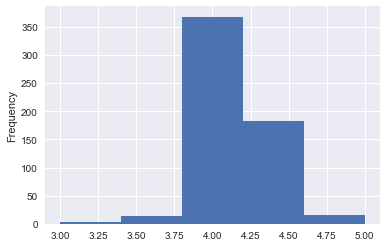

In [391]:
# look at rating distribution
print data['rating_value'].skew()
print data['rating_value'].kurt()
data['rating_value'].plot.hist(bins = 5)

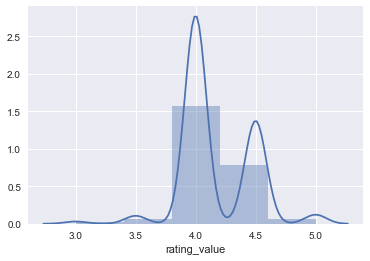

In [392]:
sns.distplot(data['rating_value'],bins = 5)

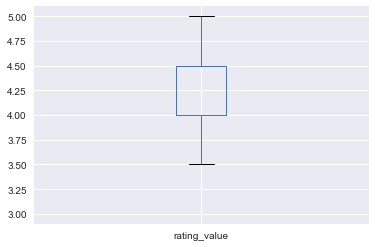

In [393]:
data['rating_value'].plot.box()

## 2. Distribution of Possible Features

### -- Borough --
The number of restaurants on yelp by Borough is very skewed, with almost all of the restaurants being either in Brooklyn or Manhattan. If you look at the density plot of ratings by Borough, see that most Boroughs have a high peak at 4, followed by another peak at 4.5, except for Queens which is the other way around. An option is to look at whether or not being in Queens is a good indicator of rating. Additionally, Staten Island and Bronx have too few datapoints to make any good conclusions. For this analysis, __Manhattan, Brooklyn, and Queens__ will only be considered.

In [394]:
data.groupby('BORO').mean()

,phone,postal_code,rating_value,review_count,ZIPCODE,Score Count,Score Recent,Score Max,Score Min,Score Average,...,Inspection,Times_Graded,Unnamed: 27,Unnamed: 28,Unnamed: 29,Unnamed: 30,price__$11-30,price__$31-60,price__Above $61,price__Under $10
BORO,,,,,,,,,,,,,,,,,,,,,
BRONX,8.181638e+09,10459.500000,4.500000,119.000000,10459.500000,11.000000,9.000000,14.000000,6.000000,9.142857,...,4.500000,3.500000,NaN,NaN,NaN,NaN,0.500000,0.000000,0.000000,0.500000
BROOKLYN,6.650808e+09,11219.822785,4.120253,330.092827,11220.265823,13.734177,11.704641,23.540084,6.852321,16.111327,...,5.113924,3.886076,NaN,NaN,NaN,NaN,0.797468,0.101266,0.008439,0.092827
MANHATTAN,3.053272e+09,10022.513109,4.166667,587.269663,10023.202247,13.254682,11.741573,22.853933,7.486891,15.739845,...,4.925094,3.831461,NaN,NaN,NaN,NaN,0.715356,0.172285,0.022472,0.086142
QUEENS,6.787066e+09,11250.861111,4.284722,282.222222,11250.875000,13.652778,11.055556,22.861111,6.472222,15.576889,...,4.986111,3.680556,NaN,NaN,NaN,NaN,0.763889,0.013889,0.013889,0.194444
STATEN ISLAND,7.185804e+09,10302.666667,4.250000,150.833333,10302.666667,12.666667,11.000000,22.166667,7.000000,14.839695,...,4.500000,3.666667,NaN,NaN,NaN,NaN,0.833333,0.000000,0.000000,0.000000


In [395]:
data['BORO'].value_counts()

MANHATTAN        267
BROOKLYN         237
QUEENS            72
STATEN ISLAND      6
BRONX              2
Name: BORO, dtype: int64

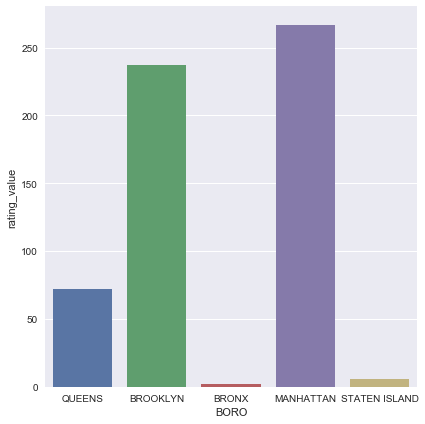

In [396]:
p = sns.factorplot(x='BORO', 
              y='rating_value',
              kind='bar',
              data = data,
              size = 6,
              estimator=len
            )

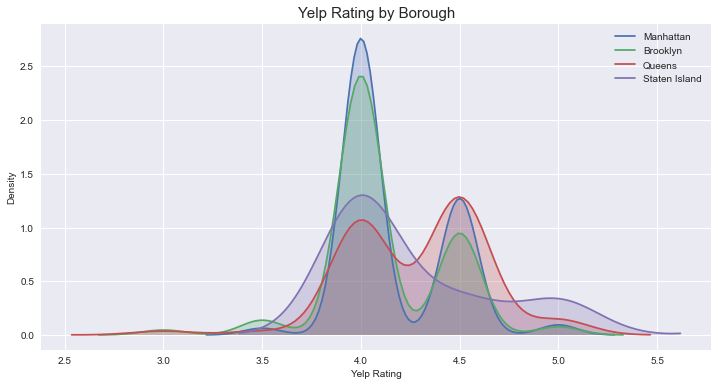

In [397]:
plt.figure(figsize=(12, 6))
sns.kdeplot(data[data.BORO == 'MANHATTAN'].rating_value, shade=True, label='Manhattan')
sns.kdeplot(data[data.BORO == 'BROOKLYN'].rating_value, shade=True, label='Brooklyn')
sns.kdeplot(data[data.BORO == 'QUEENS'].rating_value, shade=True, label='Queens')
sns.kdeplot(data[data.BORO == 'STATEN ISLAND'].rating_value, shade=True, label='Staten Island')
plt.xlabel('Yelp Rating', fontsize=10)
plt.ylabel('Density', fontsize=10)
plt.title('Yelp Rating by Borough', fontsize=15)

### -- Price Range --
Although the restaurant count by price range is also skewed with a large amount of restaurants in the $11-60 range, looking at the density plot shows a difference in the ratings by price. We will keep price range as a possible feature to analyze on.

In [398]:
data.groupby('price_range').mean()

,phone,postal_code,rating_value,review_count,ZIPCODE,Score Count,Score Recent,Score Max,Score Min,Score Average,...,Inspection,Times_Graded,Unnamed: 27,Unnamed: 28,Unnamed: 29,Unnamed: 30,price__$11-30,price__$31-60,price__Above $61,price__Under $10
price_range,,,,,,,,,,,,,,,,,,,,,
$11-30,5.240699e+09,10691.591837,4.143991,425.013605,10691.870748,14.138322,11.895692,23.732426,7.136054,16.213348,...,5.136054,3.891156,NaN,NaN,NaN,NaN,1,0,0,0
$31-60,4.052968e+09,10436.338028,4.154930,567.211268,10436.873239,11.676056,10.605634,19.267606,6.647887,13.439545,...,4.774648,3.929577,NaN,NaN,NaN,NaN,0,1,0,0
Above $61,3.812535e+09,10429.555556,4.055556,1034.888889,10444.000000,8.222222,7.222222,18.666667,5.555556,14.423040,...,3.444444,3.000000,NaN,NaN,NaN,NaN,0,0,1,0
Under $10,4.831581e+09,10772.433333,4.333333,324.283333,10772.416667,12.133333,11.766667,24.350000,7.583333,16.551355,...,4.716667,3.533333,NaN,NaN,NaN,NaN,0,0,0,1


In [399]:
data['price_range'].value_counts()

$11-30       441
$31-60        71
Under $10     60
Above $61      9
Name: price_range, dtype: int64

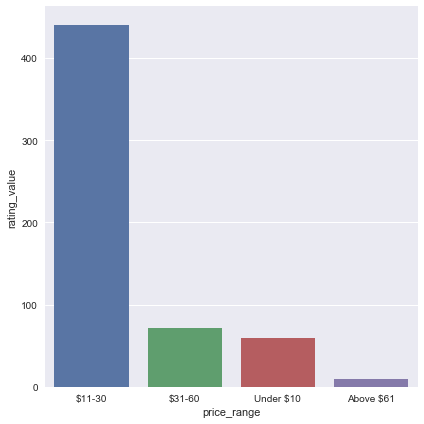

In [400]:
p = sns.factorplot(x='price_range', 
              y='rating_value',
              kind='bar',
              data = data,
              size = 6,
              estimator=len
            )

Green: 'Under $10' 
Red: '$11-30'
Purple: $31-60
Blue: 'Above $61' 


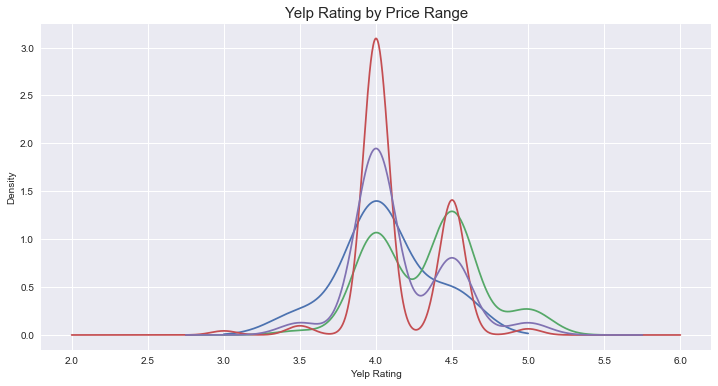

In [401]:
plt.figure(figsize=(12, 6))

print "Green: 'Under $10' "
print "Red: '$11-30'"
print "Purple: $31-60"
print "Blue: 'Above $61' "

data[data.price_range == 'Above $61'].rating_value.plot.density()
data[data.price_range == 'Under $10'].rating_value.plot.density()
data[data.price_range == '$11-30'].rating_value.plot.density()
data[data.price_range == '$31-60'].rating_value.plot.density()

plt.xlabel('Yelp Rating', fontsize=10)
plt.ylabel('Density', fontsize=10)
plt.title('Yelp Rating by Price Range', fontsize=15)



### -- Other Continuous Features --

Score Count | Score Recent | Score Max | Score Min | Score Average | Score StdDev | Review Count | Count A/B/C/P/Z Grade

To see if any of the score related features had colinearity or multicolinearity, a heat map was produced as well as the correlation matrix. Looking at the two, some features (like 'Score StdDev' and 'Score Max') seem to have high correlation but none indicate colinearity. Only some, and not all should be a strong indicator of restaurant rating.

The distributions of all of the score related features seem to be skewed with a right tail.

               Score Count  Score Recent  Score Max  Score Min  Score Average  \
Score Count       1.000000      0.123824   0.563706  -0.090173       0.382388   
Score Recent      0.123824      1.000000   0.345922   0.618608       0.509957   
Score Max         0.563706      0.345922   1.000000   0.215712       0.919766   
Score Min        -0.090173      0.618608   0.215712   1.000000       0.465709   
Score Average     0.382388      0.509957   0.919766   0.465709       1.000000   
Score StdDev      0.448749      0.070721   0.898608  -0.152694       0.745379   
review_count      0.304963     -0.028040   0.119158  -0.073571       0.047332   
Grade A Count     0.616125     -0.135362   0.172017  -0.208851      -0.010490   
Grade B Count     0.618979      0.126702   0.265256   0.012962       0.196612   
Grade C Count     0.378200      0.063022   0.215922   0.043240       0.151410   
P Count           0.081405     -0.028305   0.215833  -0.057128       0.109886   
Z Count           0.136443  

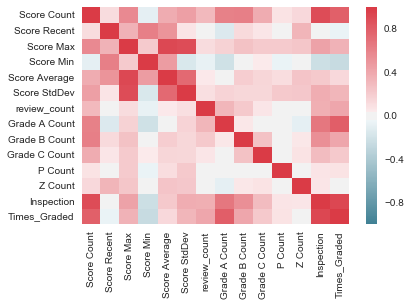

In [403]:
# check for multicolinearity
columns_to_keep = ['Score Count', 'Score Recent', 'Score Max', 'Score Min', 'Score Average', 'Score StdDev', 'review_count', 'Grade A Count', 'Grade B Count', 'Grade C Count', 'P Count', 'Z Count','Inspection', 'Times_Graded']

#plt.figure(figsize = (8,8)
cmap = sns.diverging_palette(220, 10, as_cmap=True)
correlations = data[columns_to_keep].corr()# what are we getting the correlations of?
print correlations
print sns.heatmap(correlations, cmap=cmap)


In [404]:
data[columns_to_keep].corr()

,Score Count,Score Recent,Score Max,Score Min,Score Average,Score StdDev,review_count,Grade A Count,Grade B Count,Grade C Count,P Count,Z Count,Inspection,Times_Graded
Score Count,1.000000,0.123824,0.563706,-0.090173,0.382388,0.448749,0.304963,0.616125,0.618979,0.378200,0.081405,0.136443,0.899090,0.793395
Score Recent,0.123824,1.000000,0.345922,0.618608,0.509957,0.070721,-0.028040,-0.135362,0.126702,0.063022,-0.028305,0.331415,0.015202,-0.061572
Score Max,0.563706,0.345922,1.000000,0.215712,0.919766,0.898608,0.119158,0.172017,0.265256,0.215922,0.215833,0.240190,0.430553,0.348513
Score Min,-0.090173,0.618608,0.215712,1.000000,0.465709,-0.152694,-0.073571,-0.208851,0.012962,0.043240,-0.057128,0.028886,-0.220800,-0.250137
Score Average,0.382388,0.509957,0.919766,0.465709,1.000000,0.745379,0.047332,-0.010490,0.196612,0.151410,0.109886,0.243406,0.219120,0.135509
Score StdDev,0.448749,0.070721,0.898608,-0.152694,0.745379,1.000000,0.106718,0.166087,0.147926,0.143774,0.224837,0.228754,0.369246,0.326224
review_count,0.304963,-0.028040,0.119158,-0.073571,0.047332,0.106718,1.000000,0.325190,0.221384,0.066004,-0.030054,0.001928,0.362516,0.411030
Grade A Count,0.616125,-0.135362,0.172017,-0.208851,-0.010490,0.166087,0.325190,1.000000,0.058252,0.027566,0.026531,-0.089814,0.671656,0.797909
Grade B Count,0.618979,0.126702,0.265256,0.012962,0.196612,0.147926,0.221384,0.058252,1.000000,0.261086,-0.030864,0.055433,0.536860,0.408619
Grade C Count,0.378200,0.063022,0.215922,0.043240,0.151410,0.143774,0.066004,0.027566,0.261086,1.000000,0.038767,0.082997,0.295939,0.219252


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x153a9ce50>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x15974be50>]], dtype=object)

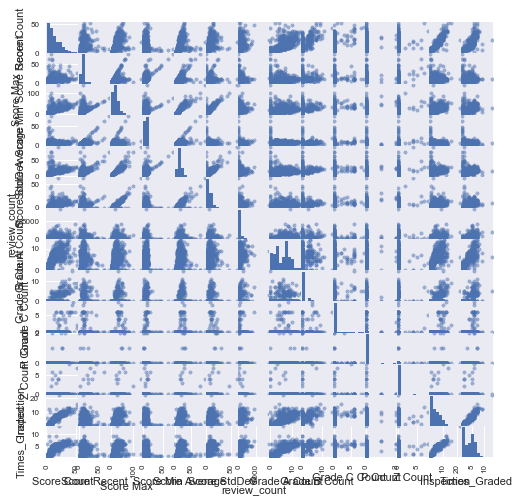

In [406]:
pd.scatter_matrix(data[columns_to_keep], figsize = (8,8))

Green: 'Times_Graded'
Blue: 'Inspections'


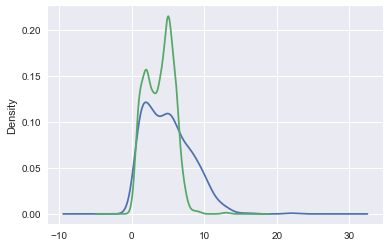

In [410]:
print "Green: 'Times_Graded'"
print "Blue: 'Inspections'"

data.Inspection.plot.density()
data.Times_Graded.plot.density()

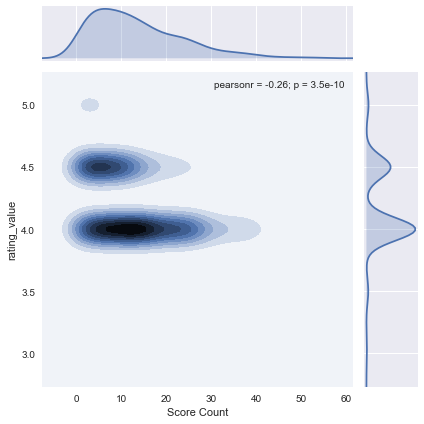

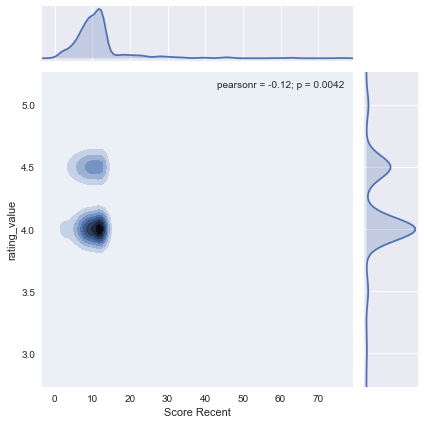

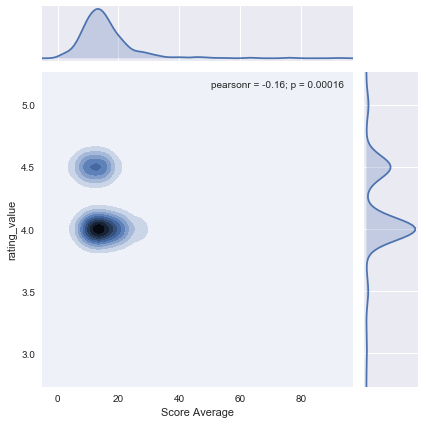

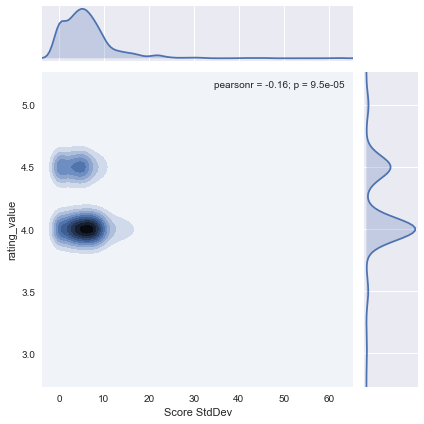

In [297]:
sns.jointplot(x="Score Count", y="rating_value", data=data, kind="kde")
sns.jointplot(x="Score Recent", y="rating_value", data=data, kind="kde")
sns.jointplot(x="Score Average", y="rating_value", data=data, kind="kde")
sns.jointplot(x="Score StdDev", y="rating_value", data=data, kind="kde")